In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_path = '../data/yulu_rental.csv'
df = pd.read_csv(data_path)

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


Профіль колонок набору даних:
datetime: дата та час зібрані погодинно
season: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
holiday: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
workingday: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
weather:
Ясно, Мало хмарно, частково хмарно
Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
temp: температура в градусах Цельсія
atemp: як відчувається температура в градусах Цельсія
humidity: вологість
windspeed: швидкість вітру
casual: кількість неформальних користувачів
registered: кількість зареєстрованих користувачів
count: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

**АНАЛІЗ 1**
1.Перевіримо як впливає **швидкість вітру** на кількість **зареєстрованих** користувачів, додатково налаштуємо діаграму так, аби колір кожної точки відповідав значенню **температури (temp).**

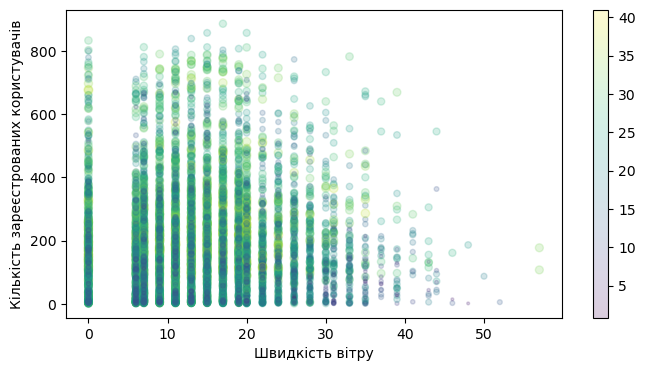

In [11]:
col_x = 'Швидкість вітру'
col_y = 'Кількість зареєстрованих користувачів'
color_feature = 'temp'
plt.figure(figsize=(8,4))
plt.scatter(df['windspeed'], df['registered'], alpha=0.2, s=df[color_feature], c=df.temp)
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.colorbar();

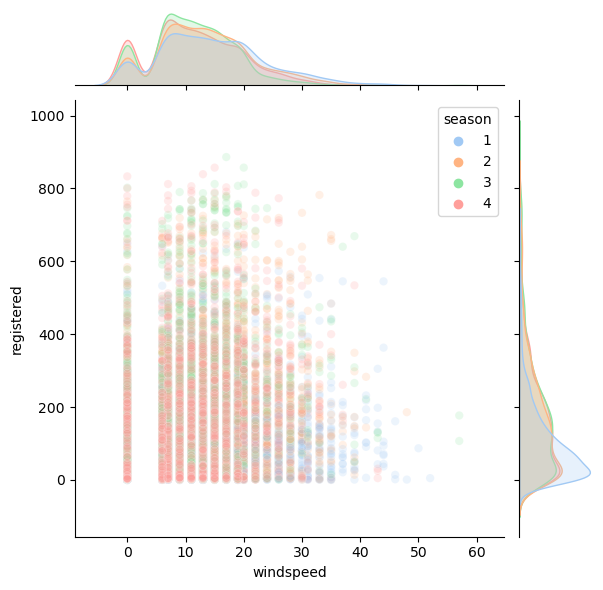

In [29]:
sns.jointplot(data=df, x="windspeed", y="registered", hue="season", alpha=.2, palette="pastel");

1. **Залежність кількості зареєстрваних користувачів від погодних умов** - ми бачимо, що чим менша швидкысть вітру тим більша кількість зареєєстровних коритувачів.П При чому ми бачимо великій розбіг в даних між щидкість вітру 0 і потім швидкістю вітру більше 5.
2. Бачимо що стала висока кількість зареєтровних коритувачів зберігається при швидкості вітру до 20, а після стає набагато нижче.
3. Також по скупченню точок ми можемо побачити що максимальна концентрація коритувачів до 550 при швидкості вітру до 20.
4. Якщо побудуэмо графік рохи інакше і додамо сезон до цих змінних - то побачимо, що найбільші пориви вітру бувають навесні і при цих супер поривах вітру ми маємо дуже низьку кількість користувачів, адже користуватися велосипедом при сильних поривах вітру - досить не просто.


**АНАЛІЗ 2**
Тут ми перевіримо сезональність - як впливає **сезонність** на кількість зареєстрованих та неформальних користувачів і чи є якісь відмінності в поведінці цих користувачів в залежності від сезону.


In [12]:
df_filtered = df[['season', 'registered', 'casual']]
df_season = df_filtered.groupby('season').sum()

In [13]:
df_season

,registered,casual
season,,
1,270893,41605
2,458610,129672
3,497944,142718
4,465894,78140


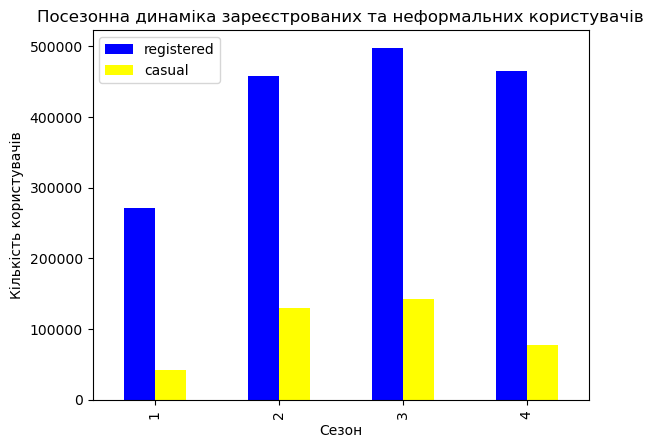

In [23]:
df_season.plot(kind='bar', xlabel= 'Сезон', ylabel='Кількість користувачів', 
               title='Поcезонна динаміка зареєстрованих та неформальних користувачів',
              color={"registered": "blue", "casual": "yellow"})
plt.show()

**Виновки, що ми можемо зробити:**
1. Кількість зареєстровних користувачів змінюється посезонно - при чому **найменша** кількість зареєстровних користувачів **навесні**. **найбільша** кількість зареєстровних користувачів **восени**. Взимку і влітку приблизно однакова кількість користувачів.
2. Кількість неформальних користувачів змінюється посезонно - при чому **найменша** кількість зареєстровних користувачів **навесні**. **найбільша** кількість зареєстровних користувачів **восени**. 
3. Цікавим є той факт, що кількість **неформальних користувачів** змінюється трохи з **іншою динамікою** - так наприклад при рівній кільксоті зареєстрованих користувачів влітку і взимку, кількість неформальних коритувачів взимку є значно меншою і це досить дивно, а отже можна дослідити цей факт. можливо це повязано з великою кількістю зимових свят, однак чому даний факт впливає лише на неформальних користувачів.

АНАЛІЗ 3
Згрупуємо дані щодо кількості взятих напрокат велосепедів за ознакою робочий ден чи ні і побачимо коли частіше за все і найбільшу кількість беруть велисопедів.

In [44]:
df_filtered_new = df[['workingday', 'count']]
df_workingday_or_not = df_filtered_new.groupby('workingday').sum().reset_index()

In [46]:
df_workingday_or_not

,workingday,count
0,0,654872
1,1,1430604


<Axes: title={'center': 'Розподіл кількості велосипедів в залежності від дня (робочий чи вихідний)'}, ylabel='count'>

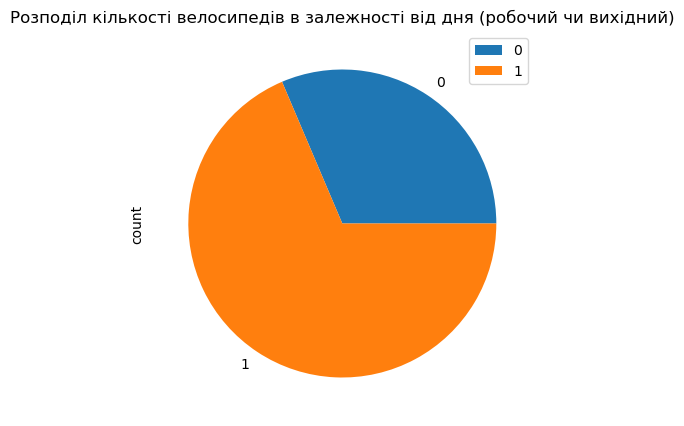

In [49]:
df_workingday_or_not.plot.pie(y='count', figsize=(5, 5), title="Розподіл кількості велосипедів в залежності від дня (робочий чи вихідний)")

Ми бачимо що переважну кількість майже 2/3 усіх взятих напрокат велосипедів беруть саме у робочі дні - а лише 1/3 у вихідні.